std
ПКО         590.979251
ПКО.1       529.147944
ОКО          47.938199
ОКО.1        31.940620
ОКО-в        26.118346
ОКО-в.1      37.136585
ИО1         775.285099
ИО1.1       739.239913
ИО2         638.630389
ИО2.1       756.218157
ИО3         762.547389
ИО3.1       770.773646
ИО4        1036.142169
ИО4.1       779.506175
ИО5         756.430614
ИО5.1       781.296042
ИО6         340.939022
ИО6.1       530.478204
ИО7         300.410169
ИО7.1       339.963660
ИО8         595.462169
ИО8.1       673.730986
ИО9         313.724042
ИО9.1       540.892853
ИО10        260.873067
ИО10.1       32.607626
ИО11         34.255069
ИО11.1      186.100444
ИО12         43.785395
ИО12.1       43.669867
ИО13         44.908962
ИО13.1       43.558492
dtype: float64

mean
ПКО        358.869628
ПКО.1      317.436108
ОКО         44.279143
ОКО.1       37.970968
ОКО-в       25.843483
ОКО-в.1     30.676921
ИО1        814.758347
ИО1.1      779.266360
ИО2        588.098562
ИО2.1      695.699758
ИО3        698.8348

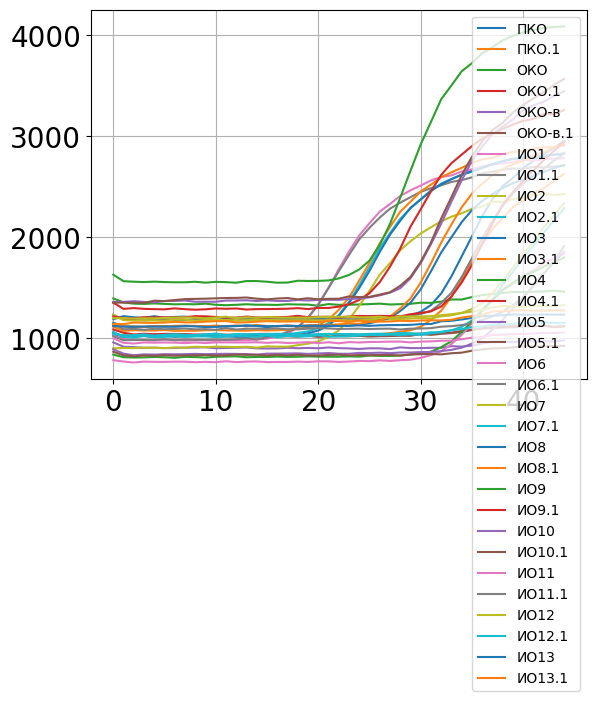

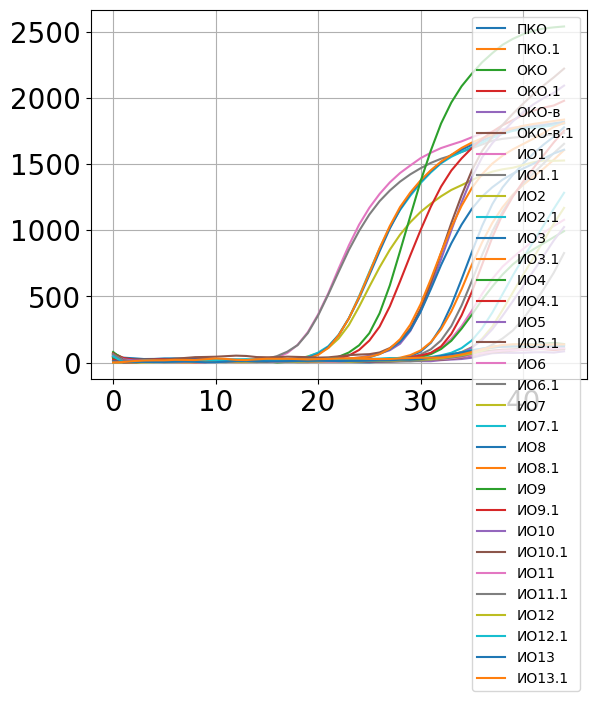

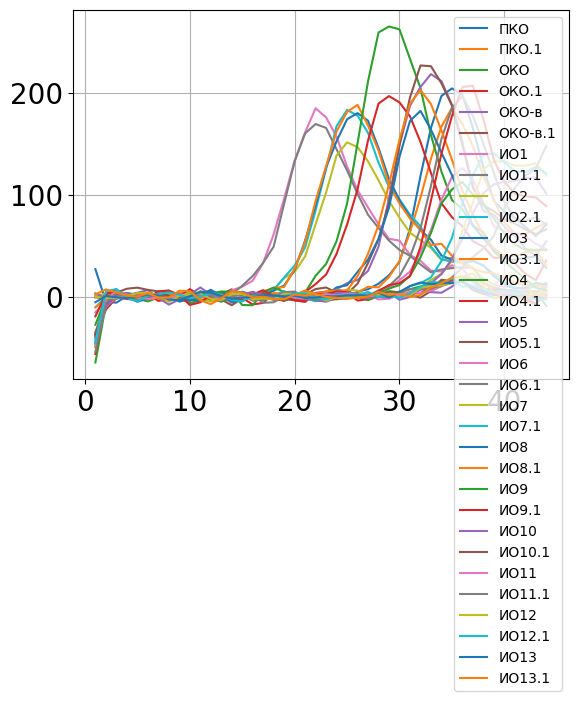

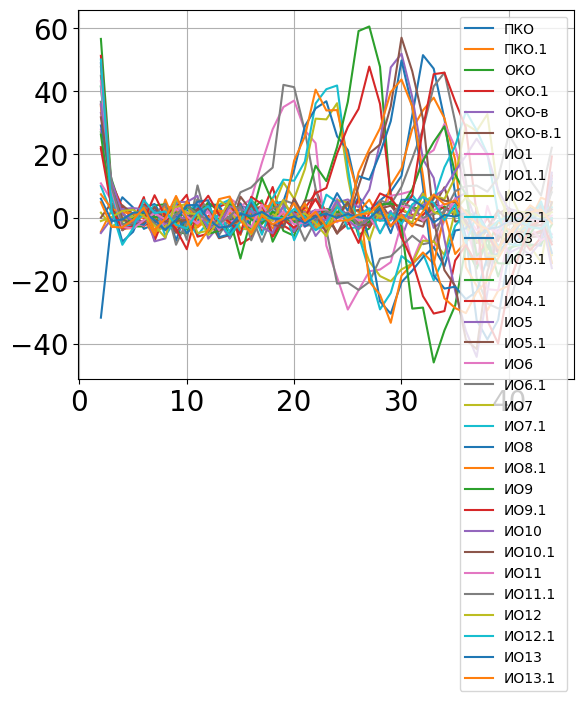

In [1]:
import os
import numpy as np
import pandas as pd 
import csv
import matplotlib.pyplot as plt
from scipy import signal

def csvreader(f):
    if os.path.splitext(f)[1]==".xlsx":
        data=pd.read_excel(f)
        #print(data)
        data1=data.values
        #print(data.shape)
        
        return data,data1
    
def zero_crossing(data):
    return np.where(np.diff(np.sign(np.array(data))))[0]
        
        
def main():
    data,data1=csvreader("C:/Users/evgen/Downloads/06_09_45 два повтора_FAM.xlsx")
    #data,data1=csvreader('C:/Users/Евгений/Downloads/06_09_45 два повтора_FAM.xlsx')
    #namecolumns=data.columns.values
    #plt.figure(figsize=(15,7))
    
    #исходные
    data.plot()
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    #нормированные и сглаженые
    data=data-data.min()
    #data= data.transform(lambda x: signal.savgol_filter(x, 14,2))
    data= data.apply(lambda x: signal.savgol_filter(x, 11,6))
    #plt.figure(figsize=(15,7))
    
    data.plot()
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    #первая производная
    #plt.figure(figsize=(15,7))
    data.diff().plot()
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #вторая производная
    #plt.figure(figsize=(15,7))
    data.diff().diff().plot()
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    #ско
    print('std')
    print(data.std())
    print()

    #среднее
    print('mean')
    print(data.mean())
    print()

    #максимум
    print('max')
    print(data.max())
    print()

    #минимум
    print('min')
    print(data.min())
    print()
    
    #индексы максимумов первой производной
    print('index max first diff')
    print(data.diff().idxmax())
    print()

    #пересечения с нулём первой производной(экстремумы)
    print('possible extremus')
    print(data.diff().apply(lambda x:zero_crossing(x)))
    print()
    
    #пересечения с нулём второй производной(точки перегиба)
    print('possible inflection points')   
    print(data.diff().diff().apply(lambda x:zero_crossing(x)))
    print()
    
    
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()